# Preprocessing Functions

## This workbook
* Imports sound files from the SAIE dataset
* Graphs and calculates the features
* Adds the features to a Dataframe, then saves down the sample data for input in the classification model 

## To do


## Updates

* 0_70 Store sample number and sample file names and add them to the dataframe
* 0_69 DER Derry files, 0_69 Antrim and Belfast files, 0_60 DUB for Dublin files
* 0_69 Clean up and check code and data; add exports of samples to WAV files
* 0_68 Sample recordings every SAMPLE_LENGTH seconds.  Add these samples to the dataframe exported along with statistics for the sample alone.  
* 0_67 Added DER Derry data,  Added regex for Windows file formats on Core i5
* 0_66 Added DOW Down data
* 0_65 Added ANT Antrim and BEL Belfast sound data, added rational expression to deal with the urban/rural and size codes in the SAIE filenames
* 0_63,4 add conversion of MP3 to WAV, add extraction of county, town, gender and age codes
* 0_6 add code for dataframe definition and export
* 0_5 added graphing of spectrogram
* 0_4 loaded Dublin full-text data

In [1]:
from datetime import datetime

# Get the current system date and time
now = datetime.now()

# Format the date and time as yyyymmdd_hhmm
formatted_date_time = now.strftime("%Y%m%d_%H%M")

# Save it to a variable
date_time_variable = formatted_date_time

# Print the variable to verify
print(date_time_variable)

20240622_2146


In [2]:
#DIR_PATH=r'/Users/peternolan/Documents/voxpop/notebooks/DUB/*.wav'
#DIR_PATH=r'/Users/peternolan/Documents/voxpop/notebooks/NI/DER/*.wav'

#DIR_PATH=r"C:\Users\peter\VoxPop\DER\*.wav" # Derry input files
DIR_PATH=r"C:\Users\peter\VoxPop\ANT\*.wav" # Antrim input files
#DIR_PATH=r"C:\Users\peter\VoxPop\DUB\*.wav" # Dublin input files


In [3]:
#!pwd
!cd 

C:\Users\peter\VoxPop


In [4]:
import librosa
librosa.__version__ 
import librosa.display

In [5]:
import numpy as np 
np.__version__

'1.26.4'

In [6]:
import pandas as pd
pd.__version__

'2.2.1'

In [7]:
import soundfile as sf

In [8]:
import math

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use("seaborn")
import glob
import IPython
from IPython.display import Audio
import re
import csv

In [10]:
from pydub import AudioSegment
import soundfile as sf
import os

In [11]:
filenames=[]
sr=[]
dur=[]
y=[]
names=[]

## Global Variables

In [72]:
DATASET_NAME = "ANT"

In [13]:
SAMPLE_OUTPUT_DIRECTORY="C:\\Users\\peter\\VoxPop\\sample_output_directory\\" 

In [14]:
SAMPLE_LENGTH=1 # seconds

In [15]:
#RESAMPLE_RATE=8000
RESAMPLE_RATE=22050

In [16]:
DIR_PATH

'C:\\Users\\peter\\VoxPop\\ANT\\*.wav'

In [17]:
res = glob.glob(DIR_PATH)
for filename in res:
    filenames.append(filename)

In [18]:
len(filenames)

66

In [19]:
def sample_duration(filename):
    d=(librosa.get_duration(path=filename))
    d=int(d*100)/100
    return d

In [20]:
def convert_MP3_to_WAV(convertfile):
    print(convertfile)
    convertaudio = AudioSegment.from_mp3(convertfile)
    convertaudio.export("convertfile.wav", format="wav")
    dur=sample_duration("convertfile.wav")
    y, sr = librosa.load("convertfile.wav",duration=dur)
    return y,sr

In [21]:
filenames

['C:\\Users\\peter\\VoxPop\\ANT\\ANT_Antrim_R1_F_20.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Antrim_R1_M_25.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Antrim_R1_M_40.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballycastle_R1_F_70.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballycastle_R1_M_25.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballycastle_R1_M_70.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballycastle_R1_M_80.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballyclare_R2_M_50.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballyclare_R2_M_55.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballymena_U2_F_20.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballymena_U2_F_25.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballymena_U2_M_20.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballymena_U2_M_20_(2).wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballymena_U2_M_20_(3).wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballymoney_R1_F_20.wav',
 'C:\\Users\\peter\\VoxPop\\ANT\\ANT_Ballymoney_R1_F_60.wav',
 'C:\\Users\\

In [22]:
for i in filenames: 
#    names.append(re.search(r'/([^/]+)\.wav$',i).group(1)) MacOs version
    names.append(re.search(r'([^\\]+).wav$',i).group(1)) #Windows version


In [23]:
len(names)

66

In [24]:
names

['ANT_Antrim_R1_F_20',
 'ANT_Antrim_R1_M_25',
 'ANT_Antrim_R1_M_40',
 'ANT_Ballycastle_R1_F_70',
 'ANT_Ballycastle_R1_M_25',
 'ANT_Ballycastle_R1_M_70',
 'ANT_Ballycastle_R1_M_80',
 'ANT_Ballyclare_R2_M_50',
 'ANT_Ballyclare_R2_M_55',
 'ANT_Ballymena_U2_F_20',
 'ANT_Ballymena_U2_F_25',
 'ANT_Ballymena_U2_M_20',
 'ANT_Ballymena_U2_M_20_(2)',
 'ANT_Ballymena_U2_M_20_(3)',
 'ANT_Ballymoney_R1_F_20',
 'ANT_Ballymoney_R1_F_60',
 'ANT_Ballymoney_R1_M_30',
 'ANT_Ballynure_R2_F_20',
 'ANT_Bushmills_R2_M_16',
 'ANT_Carnlough_R2_F_20',
 'ANT_Carrickfergus_R1_F_20',
 'ANT_Crumlin_R2_M_30',
 'ANT_Crumlin_R2_M_50',
 'ANT_Cullybackey_R2_M_30',
 'ANT_Dervock_R2_M_65',
 'ANT_Dunloy_R2_M_60',
 'ANT_Glenarm_R2_F_20',
 'ANT_Larne_R1_F_20',
 'ANT_Larne_R1_M_20',
 'ANT_Lisburn_U2_F_20',
 'ANT_Lisburn_U2_F_20_(2)',
 'ANT_Lisburn_U2_M_20',
 'ANT_Newtownabbey_R1_F_20',
 'ANT_Newtownabbey_R1_F_30',
 'ANT_Newtownabbey_R1_M_55',
 'ANT_Randalstown_R2_M_20',
 'ANT_Randalstown_R2_M_25',
 'ANT_Templepatrick_R2_M_20'

In [25]:
counties=[]
towns=[]
genders=[]
urbanrurals=[]
sizes=[]
ages=[]  

In [26]:
pattern1 = r'(?P<county>[a-zA-Z]+)_(?P<town>[a-zA-Z-]+)_(?P<gender>[MF])_(?P<age>\d+)'
pattern2 = r'(?P<county>[a-zA-Z]+)_(?P<town>[a-zA-Z-]+)_(?P<urbanrural>[UR])(?P<size>[12])_(?P<gender>[MF])_(?P<age>\d+)'

h=0

# Loop through the strings and extract the variables
for string in names:
    match1 = re.match(pattern1, string)
    match2 = re.match(pattern2, string)

    print(str(h)+" "+string)

    if match1:
        county = match1.group('county')
        counties.append(county)
        
        town = match1.group('town')
        towns.append(town)
        
        urbanrurals.append(None)
        sizes.append(None)
        
        gender = match1.group('gender') 
        genders.append(gender)
        
        age = int(match1.group('age'))
        ages.append(age)
        
    elif match2:
        county = match2.group('county')
        counties.append(county)
        
        town = match2.group('town')
        towns.append(town)
        
        urbanrural = match2.group('urbanrural')  # 'U' or 'R'
        urbanrurals.append(urbanrural)
        
        size=match2.group('size')
        sizes.append(size)
        
        gender = match2.group('gender')  # '1' or '2'
        genders.append(gender)
        
        age = int(match2.group('age'))
        ages.append(age)
        
   #     print(county,town,gender,age)
   #     print("\n")
    h+=1


0 ANT_Antrim_R1_F_20
1 ANT_Antrim_R1_M_25
2 ANT_Antrim_R1_M_40
3 ANT_Ballycastle_R1_F_70
4 ANT_Ballycastle_R1_M_25
5 ANT_Ballycastle_R1_M_70
6 ANT_Ballycastle_R1_M_80
7 ANT_Ballyclare_R2_M_50
8 ANT_Ballyclare_R2_M_55
9 ANT_Ballymena_U2_F_20
10 ANT_Ballymena_U2_F_25
11 ANT_Ballymena_U2_M_20
12 ANT_Ballymena_U2_M_20_(2)
13 ANT_Ballymena_U2_M_20_(3)
14 ANT_Ballymoney_R1_F_20
15 ANT_Ballymoney_R1_F_60
16 ANT_Ballymoney_R1_M_30
17 ANT_Ballynure_R2_F_20
18 ANT_Bushmills_R2_M_16
19 ANT_Carnlough_R2_F_20
20 ANT_Carrickfergus_R1_F_20
21 ANT_Crumlin_R2_M_30
22 ANT_Crumlin_R2_M_50
23 ANT_Cullybackey_R2_M_30
24 ANT_Dervock_R2_M_65
25 ANT_Dunloy_R2_M_60
26 ANT_Glenarm_R2_F_20
27 ANT_Larne_R1_F_20
28 ANT_Larne_R1_M_20
29 ANT_Lisburn_U2_F_20
30 ANT_Lisburn_U2_F_20_(2)
31 ANT_Lisburn_U2_M_20
32 ANT_Newtownabbey_R1_F_20
33 ANT_Newtownabbey_R1_F_30
34 ANT_Newtownabbey_R1_M_55
35 ANT_Randalstown_R2_M_20
36 ANT_Randalstown_R2_M_25
37 ANT_Templepatrick_R2_M_20
38 ANT_Toomebridge_R2_M_30
39 BEL_City_F_20
40

In [27]:
counties

['ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'ANT',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL']

In [28]:
names

['ANT_Antrim_R1_F_20',
 'ANT_Antrim_R1_M_25',
 'ANT_Antrim_R1_M_40',
 'ANT_Ballycastle_R1_F_70',
 'ANT_Ballycastle_R1_M_25',
 'ANT_Ballycastle_R1_M_70',
 'ANT_Ballycastle_R1_M_80',
 'ANT_Ballyclare_R2_M_50',
 'ANT_Ballyclare_R2_M_55',
 'ANT_Ballymena_U2_F_20',
 'ANT_Ballymena_U2_F_25',
 'ANT_Ballymena_U2_M_20',
 'ANT_Ballymena_U2_M_20_(2)',
 'ANT_Ballymena_U2_M_20_(3)',
 'ANT_Ballymoney_R1_F_20',
 'ANT_Ballymoney_R1_F_60',
 'ANT_Ballymoney_R1_M_30',
 'ANT_Ballynure_R2_F_20',
 'ANT_Bushmills_R2_M_16',
 'ANT_Carnlough_R2_F_20',
 'ANT_Carrickfergus_R1_F_20',
 'ANT_Crumlin_R2_M_30',
 'ANT_Crumlin_R2_M_50',
 'ANT_Cullybackey_R2_M_30',
 'ANT_Dervock_R2_M_65',
 'ANT_Dunloy_R2_M_60',
 'ANT_Glenarm_R2_F_20',
 'ANT_Larne_R1_F_20',
 'ANT_Larne_R1_M_20',
 'ANT_Lisburn_U2_F_20',
 'ANT_Lisburn_U2_F_20_(2)',
 'ANT_Lisburn_U2_M_20',
 'ANT_Newtownabbey_R1_F_20',
 'ANT_Newtownabbey_R1_F_30',
 'ANT_Newtownabbey_R1_M_55',
 'ANT_Randalstown_R2_M_20',
 'ANT_Randalstown_R2_M_25',
 'ANT_Templepatrick_R2_M_20'

In [29]:
towns

['Antrim',
 'Antrim',
 'Antrim',
 'Ballycastle',
 'Ballycastle',
 'Ballycastle',
 'Ballycastle',
 'Ballyclare',
 'Ballyclare',
 'Ballymena',
 'Ballymena',
 'Ballymena',
 'Ballymena',
 'Ballymena',
 'Ballymoney',
 'Ballymoney',
 'Ballymoney',
 'Ballynure',
 'Bushmills',
 'Carnlough',
 'Carrickfergus',
 'Crumlin',
 'Crumlin',
 'Cullybackey',
 'Dervock',
 'Dunloy',
 'Glenarm',
 'Larne',
 'Larne',
 'Lisburn',
 'Lisburn',
 'Lisburn',
 'Newtownabbey',
 'Newtownabbey',
 'Newtownabbey',
 'Randalstown',
 'Randalstown',
 'Templepatrick',
 'Toomebridge',
 'City',
 'City',
 'City',
 'City',
 'City',
 'City',
 'City',
 'City',
 'City',
 'City',
 'City',
 'Drumbeg',
 'East',
 'East',
 'East',
 'East',
 'North',
 'North',
 'North',
 'North',
 'North',
 'North',
 'North',
 'OrmeauRoad',
 'South',
 'South',
 'Whitehouse']

In [30]:
urbanrurals

['R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'U',
 'U',
 'U',
 'U',
 'U',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'U',
 'U',
 'U',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [31]:
genders

['F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M']

In [32]:
sizes

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [33]:
ages

[20,
 25,
 40,
 70,
 25,
 70,
 80,
 50,
 55,
 20,
 25,
 20,
 20,
 20,
 20,
 60,
 30,
 20,
 16,
 20,
 20,
 30,
 50,
 30,
 65,
 60,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 30,
 55,
 20,
 25,
 20,
 30,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 35,
 40,
 40,
 20,
 20,
 30,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20]

In [34]:
print(len(counties))
print(len(towns))
print(len(urbanrurals))
print(len(sizes))
print(len(genders))
print(len(ages))

66
66
66
66
66
66


In [35]:
h=0
for filename in filenames:
    file_duration=sample_duration(filename)
    file_y, file_sr= librosa.load(filename,duration=sample_duration(filename))
    
    if len(file_y)==0:
        print("MP3 converted to WAV\n")
        print(str(h))
        file_y, file_sr=convert_MP3_to_WAV(filename)
         
    resample_y=librosa.resample(file_y, orig_sr=file_sr, target_sr=RESAMPLE_RATE)
    
    y.append(resample_y)
    sr.append(RESAMPLE_RATE)
    dur.append(file_duration)
    h+=1

In [36]:
len(y)

66

In [37]:
len(filenames)

66

In [38]:
y[0].shape

(2115648,)

In [39]:
for i in range(0,len(filenames)):
    print(str(i)+" "+filenames[i])
    #print(y[i][0])
   #IPython.display.display(Audio(data=y[i], rate=sr[i]))

0 C:\Users\peter\VoxPop\ANT\ANT_Antrim_R1_F_20.wav
1 C:\Users\peter\VoxPop\ANT\ANT_Antrim_R1_M_25.wav
2 C:\Users\peter\VoxPop\ANT\ANT_Antrim_R1_M_40.wav
3 C:\Users\peter\VoxPop\ANT\ANT_Ballycastle_R1_F_70.wav
4 C:\Users\peter\VoxPop\ANT\ANT_Ballycastle_R1_M_25.wav
5 C:\Users\peter\VoxPop\ANT\ANT_Ballycastle_R1_M_70.wav
6 C:\Users\peter\VoxPop\ANT\ANT_Ballycastle_R1_M_80.wav
7 C:\Users\peter\VoxPop\ANT\ANT_Ballyclare_R2_M_50.wav
8 C:\Users\peter\VoxPop\ANT\ANT_Ballyclare_R2_M_55.wav
9 C:\Users\peter\VoxPop\ANT\ANT_Ballymena_U2_F_20.wav
10 C:\Users\peter\VoxPop\ANT\ANT_Ballymena_U2_F_25.wav
11 C:\Users\peter\VoxPop\ANT\ANT_Ballymena_U2_M_20.wav
12 C:\Users\peter\VoxPop\ANT\ANT_Ballymena_U2_M_20_(2).wav
13 C:\Users\peter\VoxPop\ANT\ANT_Ballymena_U2_M_20_(3).wav
14 C:\Users\peter\VoxPop\ANT\ANT_Ballymoney_R1_F_20.wav
15 C:\Users\peter\VoxPop\ANT\ANT_Ballymoney_R1_F_60.wav
16 C:\Users\peter\VoxPop\ANT\ANT_Ballymoney_R1_M_30.wav
17 C:\Users\peter\VoxPop\ANT\ANT_Ballynure_R2_F_20.wav
18 C:\Us

In [ ]:
'''h=0
for i,j,k in zip(filenames,y,sr):
    print(str(h)+i)
    IPython.display.display(Audio(data=i, rate=j))
    h+=1
'''

In [40]:
#Check filenames are successfully converted to WAV
h=-1
for i,j,k in zip(y,sr,names):
    h+=1
    if len(i)==0: 
        print("Broken: "+str(k))
    else:
        print(str(h)+" OK: "+str(k))
        continue

0 OK: ANT_Antrim_R1_F_20
1 OK: ANT_Antrim_R1_M_25
2 OK: ANT_Antrim_R1_M_40
3 OK: ANT_Ballycastle_R1_F_70
4 OK: ANT_Ballycastle_R1_M_25
5 OK: ANT_Ballycastle_R1_M_70
6 OK: ANT_Ballycastle_R1_M_80
7 OK: ANT_Ballyclare_R2_M_50
8 OK: ANT_Ballyclare_R2_M_55
9 OK: ANT_Ballymena_U2_F_20
10 OK: ANT_Ballymena_U2_F_25
11 OK: ANT_Ballymena_U2_M_20
12 OK: ANT_Ballymena_U2_M_20_(2)
13 OK: ANT_Ballymena_U2_M_20_(3)
14 OK: ANT_Ballymoney_R1_F_20
15 OK: ANT_Ballymoney_R1_F_60
16 OK: ANT_Ballymoney_R1_M_30
17 OK: ANT_Ballynure_R2_F_20
18 OK: ANT_Bushmills_R2_M_16
19 OK: ANT_Carnlough_R2_F_20
20 OK: ANT_Carrickfergus_R1_F_20
21 OK: ANT_Crumlin_R2_M_30
22 OK: ANT_Crumlin_R2_M_50
23 OK: ANT_Cullybackey_R2_M_30
24 OK: ANT_Dervock_R2_M_65
25 OK: ANT_Dunloy_R2_M_60
26 OK: ANT_Glenarm_R2_F_20
27 OK: ANT_Larne_R1_F_20
28 OK: ANT_Larne_R1_M_20
29 OK: ANT_Lisburn_U2_F_20
30 OK: ANT_Lisburn_U2_F_20_(2)
31 OK: ANT_Lisburn_U2_M_20
32 OK: ANT_Newtownabbey_R1_F_20
33 OK: ANT_Newtownabbey_R1_F_30
34 OK: ANT_Newtownabb

In [41]:
samples=[]

In [42]:
len(y)

66

In [43]:
# Create samples from each recording file
h=0
for j in y:
    
    num_samples=math.floor(len(j)/(sr[h]*SAMPLE_LENGTH))
    #print(h,names[h])
    sample=[]
    
    for i in range(0,num_samples):
        sample_start=i*sr[0]*SAMPLE_LENGTH
        sample_end=(i+1)*sr[0]*SAMPLE_LENGTH 
        sample.append(j[sample_start:sample_end])
        
        #if len(sample.size==0: 
        #    sample=new_sample
        #else: 
        #    sample=np.append(sample,[new_sample],axis=0)
        #print(i,sample_start/sr[h],sample_end/sr[h])
    h+=1
    samples.append(sample)


In [44]:
len(samples)

66

In [45]:
samples[0][0].shape

(22050,)

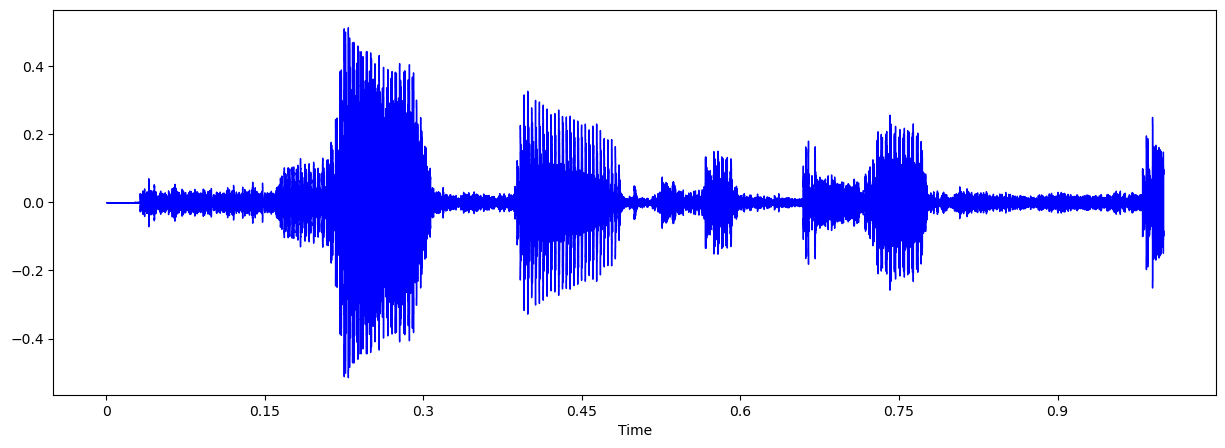

In [46]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y=samples[0][0], sr=sr[0], label=names[0],color='b')

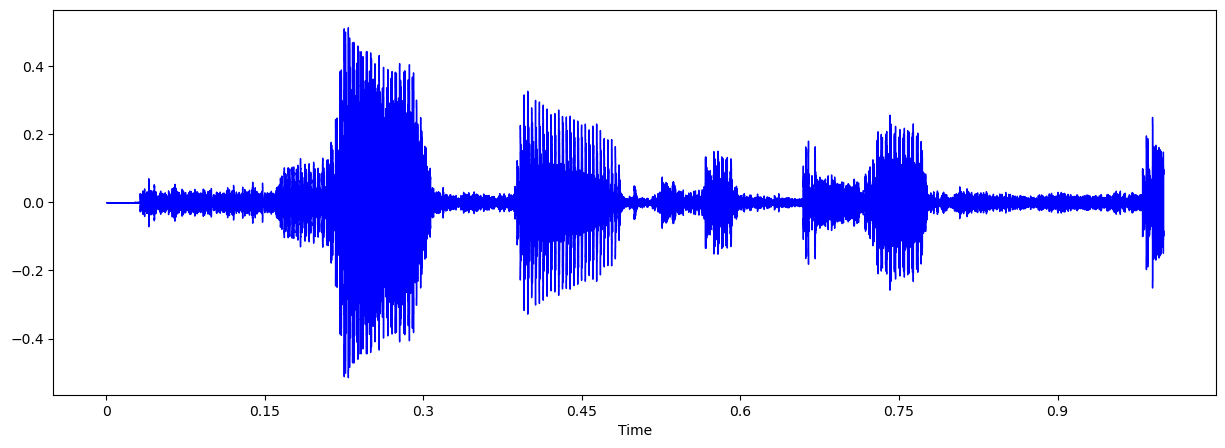

In [47]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y=y[0][0:22050], sr=sr[0], label=names[0],color='b')

In [48]:
print(names[0])
IPython.display.display(Audio(data=samples[0][0], rate=sr[0]))

ANT_Antrim_R1_F_20


### Print waveform of all input sound files

In [ ]:
h=0
for i,j,k in zip(y,sr,names):
    print(h)
    #plt.subplot(len(y),1,h)
    librosa.display.waveshow(y=i, sr=j, label=k,color='b')
    plt.legend()
    plt.show()
    h+=1

In [ ]:
mfccs = librosa.feature.mfcc(y=samples[0][0], sr=sr[0], n_mfcc=30)
print(mfccs.shape)

plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, sr=sr[0], x_axis='time',y_axis="mel")
plt.show()

In [ ]:
Ydb=[]

In [ ]:
# graph power for every single input file 
h=0
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    Y=librosa.stft(i)
    Ydb.append(librosa.amplitude_to_db(abs(Y)))
    librosa.display.specshow(Ydb[-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    print(str(h)+" "+k)
    plt.title(k)
    plt.figure(figsize=(7, 2.5))
    plt.show()
    h+=1

In [ ]:
len(Ydb)

In [ ]:
Ydb[0].shape

In [ ]:
"""
Y = librosa.stft(y[0])
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr[0], x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()    
""" 

## Calculate Features

In [49]:
Ydb=[]
mfcc=[]
mfcc_delta=[]
mfcc_delta_2=[]
sample_file_names=[]

In [50]:
#Calculate features for each sample by iteration through the samples; add each to a master list
h=0
for i in samples:
    for j in i:
        Y=librosa.stft(j)
        Ydb.append(librosa.amplitude_to_db(abs(Y)))
        mfcc.append(librosa.feature.mfcc(y=j, sr=sr[h]))
        mfcc_delta.append(librosa.feature.delta(mfcc[-1]))
        mfcc_delta_2.append(librosa.feature.delta(mfcc[-1], order=2))

    h+=1        

In [51]:
print(len(Ydb))
print(Ydb[0].shape)

6494
(1025, 44)


### Iterate through the recordings and save the samples

In [52]:
# iterate through the recordings and save them 

h=0
for i in range(0,len(samples)):
    for j in range(0,len(samples[i])):
        sample_file_names.append(names[i]+"_Rec_"+str(i)+"_Sample_"+str(j)+".wav")
        #print(sample_file_names[h])
        sf.write(SAMPLE_OUTPUT_DIRECTORY+sample_file_names[h], samples[i][j], sr[i], subtype='PCM_24')
        h+=1


In [53]:
'''
# Calculate the features by recording, iterating through the recordings
for i,j in zip(samples,sr):
    mfcc.append(librosa.feature.mfcc(y=i, sr=j))
    mfcc_delta.append(librosa.feature.delta(mfcc[-1]))
    mfcc_delta_2.append(librosa.feature.delta(mfcc[-1], order=2))
'''

'\n# Calculate the features by recording, iterating through the recordings\nfor i,j in zip(samples,sr):\n    mfcc.append(librosa.feature.mfcc(y=i, sr=j))\n    mfcc_delta.append(librosa.feature.delta(mfcc[-1]))\n    mfcc_delta_2.append(librosa.feature.delta(mfcc[-1], order=2))\n'

In [55]:
print(len(Ydb))
print(len(mfcc))
print(len(mfcc_delta))
print(len(mfcc_delta_2))
print(len(Ydb))

6494
6494
6494
6494
6494


## Graph features by recording

In [ ]:
# Graph the feature for each recording
h=1
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    #Y=librosa.stft(i)
    #Ydb.append(librosa.amplitude_to_db(abs(Y)))
    print(str(h)+": "+k)
    librosa.display.specshow(mfcc[h-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    plt.title(k+" "+r'MFCC')
    plt.figure(figsize=(14, 5))
    plt.show()
    h+=1

In [ ]:
# Graph the feature for each recording
h=1
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    #Y=librosa.stft(i)
    #Ydb.append(librosa.amplitude_to_db(abs(Y)))
    librosa.display.specshow(mfcc_delta[h-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    print(str(h)+": "+k)
    plt.title(k+" "+r'MFCC-$\Delta$')
    plt.figure(figsize=(14, 5))
    plt.show()
    h+=1

In [ ]:
# Graph the feature for each recording
h=1
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    Y=librosa.stft(i)
    #Ydb.append(librosa.amplitude_to_db(abs(Y)))
    librosa.display.specshow(mfcc_delta_2[h-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    print(str(h)+": "+k)
    plt.title(k+" "+r'MFCC-$\Delta^2$')
    plt.figure(figsize=(14, 5))
    plt.show()
    h+=1

## Define and export the DataFrame of Samples and their Characteristics

In [56]:
print(len(filenames))
print(len(names))
print(len(dur))
print(len(y))
print(len(sr))
print(len(Ydb))
print(len(mfcc))
print(len(mfcc_delta))
print(len(mfcc_delta_2))

66
66
66
66
66
6494
6494
6494
6494


In [57]:
del(df)

NameError: name 'df' is not defined

In [58]:
df_columns=[
    "filenames","names","counties","towns","urbanrural","size","genders","ages","dur","recording num","sample num","sample file name","sample","Ydb","sr","mfcc","mfcc_delta","mfcc_delta_2"
]

In [60]:
df=pd.DataFrame(columns=df_columns)

In [61]:
df[80:84]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2


In [62]:
h=0
for i in range(0,len(samples)):
    for j in range(0,len(samples[i])):
        #insert_row=pd.DataFrame([{"filenames":i,"names":j}])
        insert_row= pd.DataFrame([{"filenames":filenames[i], 
                      "names":names[i],
                      "counties":counties[i],
                      "towns":towns[i],
                      "urbanrural":urbanrurals[i],
                      'size':sizes[i],
                      'genders':genders[i],
                      'ages':ages[i],
                      'dur':dur[i],
                      'recording num':i,
                      'sample num':j,
                      'sample file name':sample_file_names[h],
                      'sample': samples[i][j],
                      'Ydb': Ydb[h],
                      'sr': sr[i],
                      'mfcc': mfcc[h],
                      'mfcc_delta': mfcc_delta[h],
                      'mfcc_delta_2': mfcc_delta_2[h]}])
        df = pd.concat([df,insert_row],ignore_index=True)
        h+=1

C:\Users\peter\AppData\Local\Temp\ipykernel_12332\4282055374.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,insert_row],ignore_index=True)


In [63]:
df.size

116892

In [64]:
df[80:82]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2
80,C:\Users\peter\VoxPop\ANT\ANT_Antrim_R1_F_20.wav,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,80,ANT_Antrim_R1_F_20_Rec_0_Sample_80.wav,"[-0.005446762, -0.0066472366, -0.0064038895, -...","[[-9.844185, -12.774447, -13.34241, -12.043291...",22050,"[[-202.93607, -91.67953, -94.67605, -149.91838...","[[-19.393772, -19.393772, -19.393772, -19.3937...","[[-14.591207, -14.591207, -14.591207, -14.5912..."
81,C:\Users\peter\VoxPop\ANT\ANT_Antrim_R1_F_20.wav,ANT_Antrim_R1_F_20,ANT,Antrim,R,1,F,20,95.95,0,81,ANT_Antrim_R1_F_20_Rec_0_Sample_81.wav,"[-0.006133534, -0.00463512, -0.0019354858, -0....","[[-18.491436, -28.119572, -28.188408, -29.2526...",22050,"[[-367.80045, -330.25327, -325.34702, -316.495...","[[-0.046417747, -0.046417747, -0.046417747, -0...","[[-6.3501725, -6.3501725, -6.3501725, -6.35017..."


In [ ]:
'''
# DataFrame defintion by recording

df=pd.DataFrame(
    "filenames": filenames,
    "names": names,
    "counties": counties,
    "towns": towns,
    "urbanrural": urbanrurals,
    "size": sizes,
    "genders": genders,
    "ages": ages,
    "dur":dur,
    "y":y,
    "Ydb":Ydb,
    "sr":RESAMPLE_RATE,
    "mfcc":mfcc,
    "mfcc_delta":mfcc_delta,
    "mfcc_delta_2":mfcc_delta_2
'''

In [65]:
df.shape

(6494, 18)

In [66]:
print(df['sample'].iloc[0])

[-3.2596290e-09 -1.9790605e-09 -1.8626451e-09 ...  3.2416232e-02
  9.7716980e-02 -1.6670101e-03]


In [67]:
df['sample'].iloc[0].shape

(22050,)

In [68]:
df['mfcc'].iloc[0].shape

(20, 44)

In [73]:
df.to_csv(date_time_variable+"_"+DATASET_NAME+'_features.csv')

'DUB'